In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


## 分箱(Binning), 离散化(Discretization)

In [11]:
def make_wave(n_samples):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

X, y = make_wave(n_samples=100)

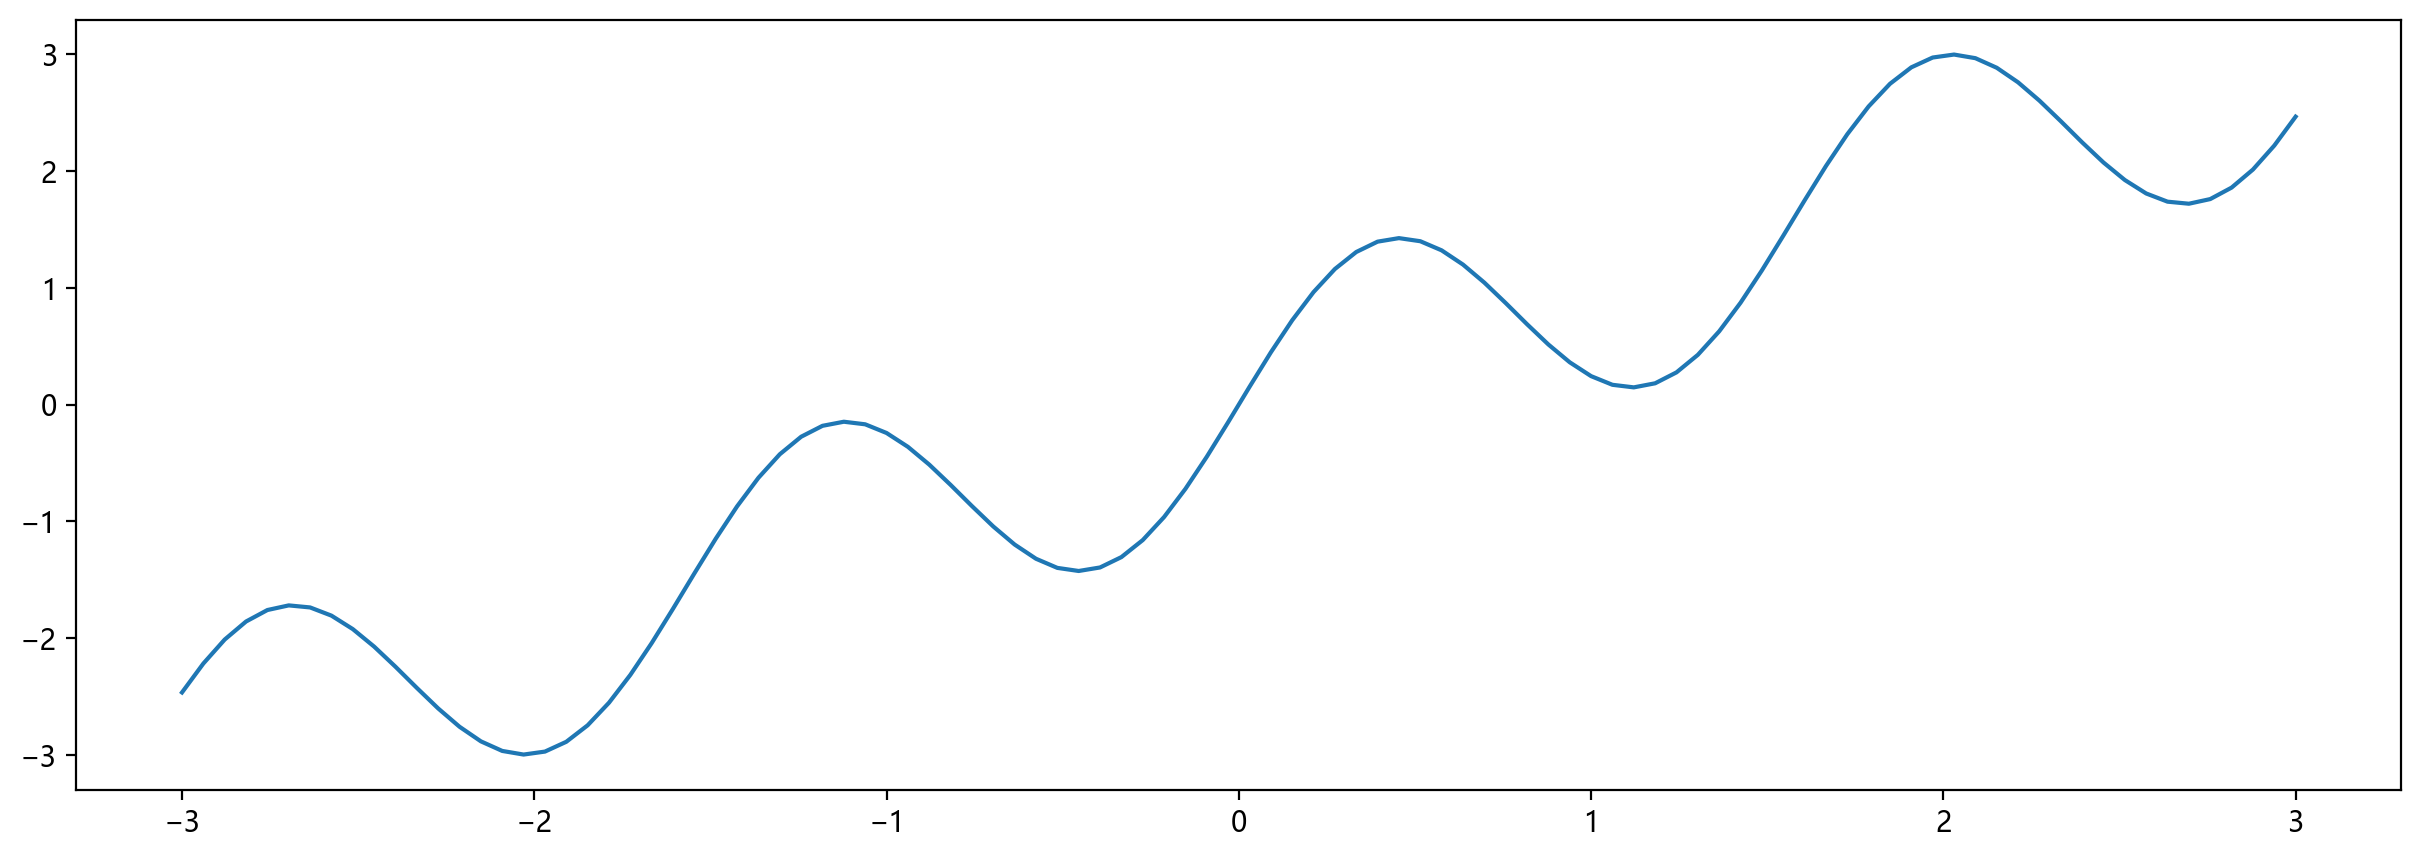

In [16]:
x = np.linspace(-3,3, num=100)
plt.figure(figsize=(15,5), dpi=200)
plt.plot(x, np.sin(4 * x) + x)

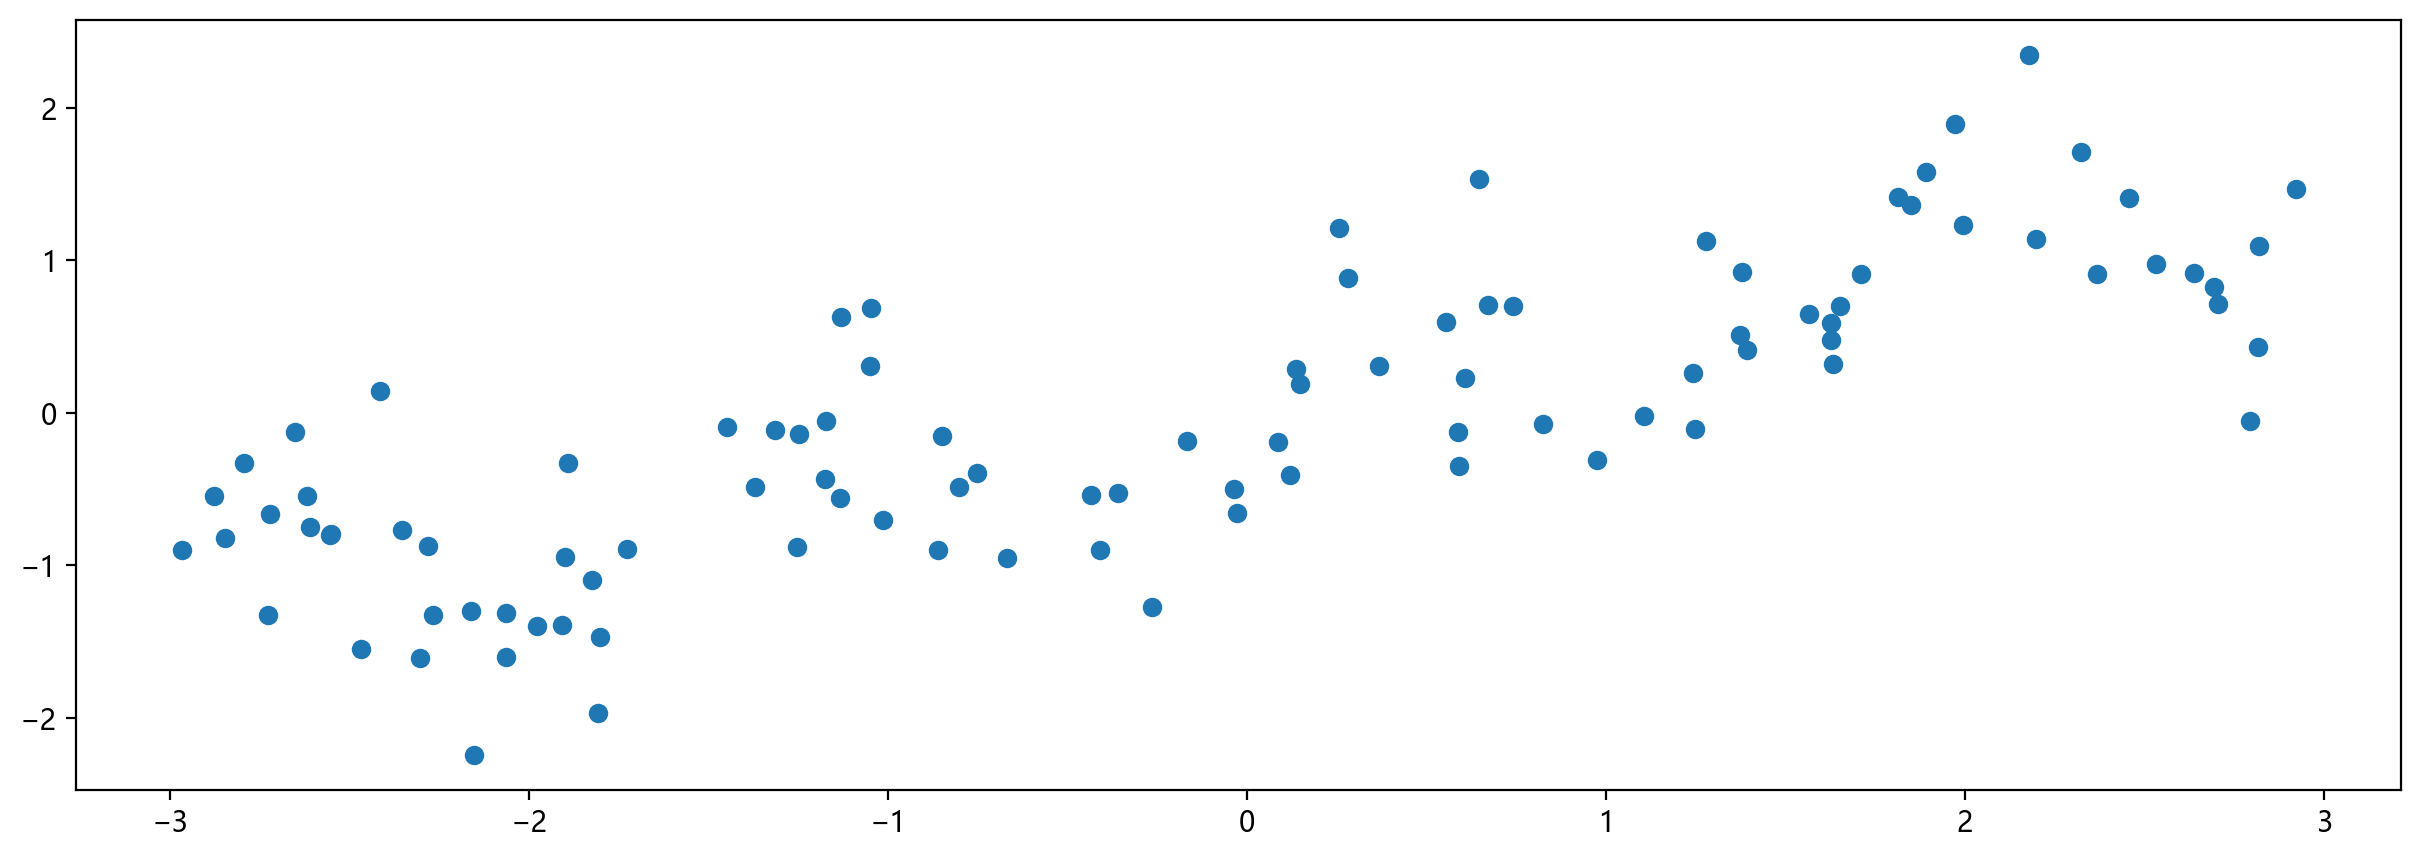

In [17]:
plt.figure(figsize=(15,5), dpi=200)
plt.scatter(X, y)

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

lm_reg = LinearRegression().fit(X, y)
dt_reg15 = DecisionTreeRegressor(min_samples_split=15).fit(X, y)
dt_reg3 = DecisionTreeRegressor(min_samples_split=3).fit(X, y)

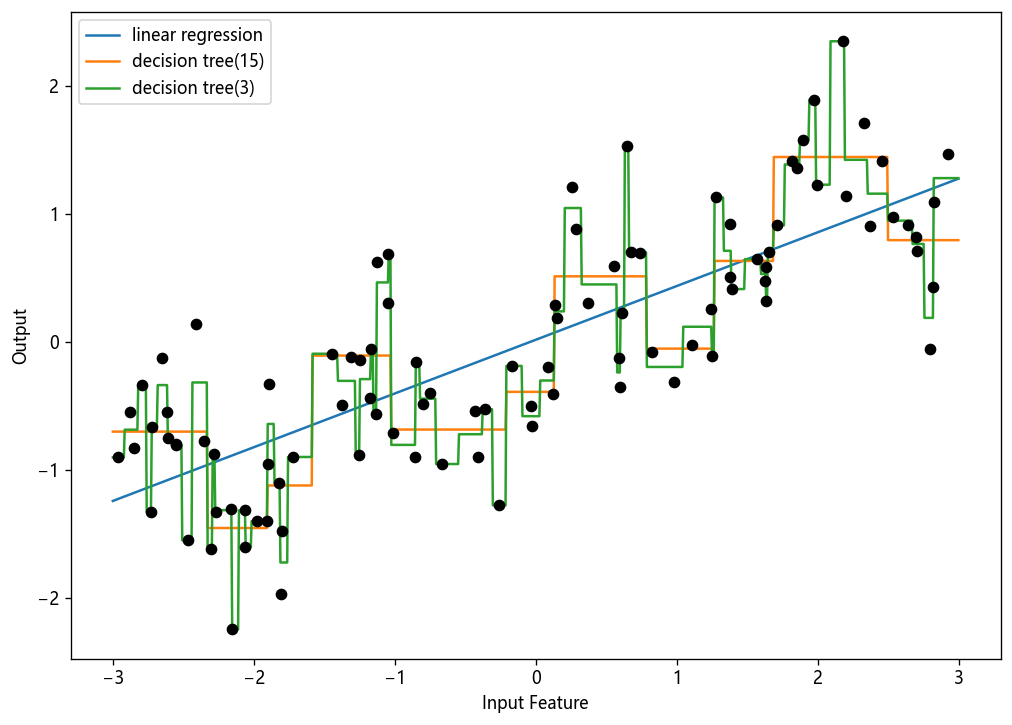

In [24]:
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

plt.figure(num=None, figsize=(10, 7), dpi=120)
plt.plot(line, lm_reg.predict(line), label="linear regression")
plt.plot(line, dt_reg15.predict(line), label="decision tree(15)")
plt.plot(line, dt_reg3.predict(line), label="decision tree(3)")
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Output")
plt.xlabel("Input Feature")
plt.legend(loc="best");

划分成固定个数的箱子(bin)，比如，在$[-3, 3]$之间划分出$10$个均匀分布的箱子。使用`linspace`创建连续的$11$个点，从而创建$10$个箱子。

In [26]:
bins = np.linspace(-3, 3, 11)

bins

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [27]:
which_bin = np.digitize(X, bins=bins)

print("\n数据点:\n", X[:5])
print("\n分箱后的数据点:\n", which_bin[:5])


数据点:
 [[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]]

分箱后的数据点:
 [[ 4]
 [10]
 [ 8]
 [ 6]
 [ 2]]


分箱后，将每个分箱作为分类特征的分类项转换成$0-1$的哑变量

In [29]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder(categories='auto', sparse_output=False)
onehot_encoder.fit(which_bin)

X_binned = onehot_encoder.transform(which_bin)

print('Shape: ', X_binned.shape)
print(' Data:\n', X_binned[:5])

Shape:  (100, 10)
 Data:
 [[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [30]:
lmbin_reg = LinearRegression().fit(X_binned, y) # 线性回归

dtbin_reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y) # 决策树回归

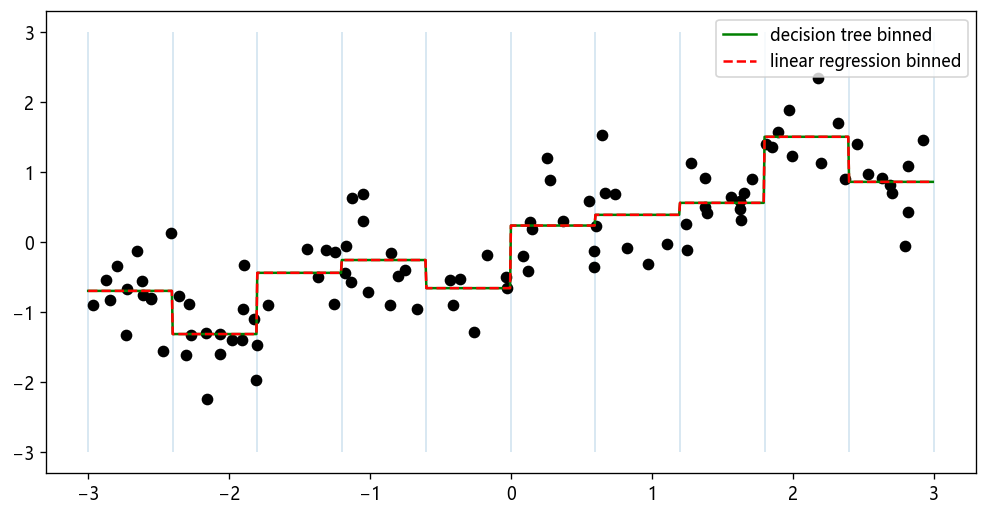

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
line_binned = onehot_encoder.transform(np.digitize(line, bins=bins))

lmbin_reg = LinearRegression().fit(X_binned, y) # 线性回归

dtbin_reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y) # 决策树回归

lm_pred = lmbin_reg.predict(line_binned)
dt_pred = dtbin_reg.predict(line_binned)

plt.figure(figsize=(10, 5), dpi=120)
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.plot(X[:, 0], y, 'o', c='k')
plt.plot(line, dt_pred, c='g', label='decision tree binned')
plt.plot(line, lm_pred, ls='--', c='r', label='linear regression binned')
plt.legend(loc="best");

